In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
def read(folder, nodes):
    paths = {}
    paths_pgo = {}
    t0 = None
    for i in nodes:
        output_folder = folder + str(i) + "/"
        _paths, t0 = read_paths(output_folder, nodes, t0=t0)
        _paths_pgo, t0 = read_paths(output_folder, nodes, prefix="pgo_", t0=t0)
        paths[i] = _paths[i]
        paths_pgo[i] = _paths_pgo[i]
    return paths, paths_pgo, t0

Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m,PGO:ATE Pos,ATE Att
1,297.9m,1.618,5.750,1.4e-03,1.7e-03,8.7e-04,4.64e-02,0.287,3.395°
2,277.0m,0.126,2.616,2.0e-03,1.7e-02,5.1e-03,1.09e-02,0.414,2.461°
3,303.6m,0.804,4.503,2.3e-02,5.1e-02,1.4e-02,4.11e-02,0.273,3.661°
4,113.3m,0.800,4.150,1.3e-04,1.7e-04,4.6e-04,3.67e-03,0.242,3.629°
5,269.2m,0.302,2.518,6.6e-04,2.1e-03,9.1e-04,1.04e-02,0.381,2.906°
Avg.,252.2,0.730,3.91,,,,,0.319,3.21


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.036,0.057,0.055",0.087,0.99°,"-0.005,+0.003,-0.013",-0.11°
3->1,"0.149,0.741,0.211",0.785,2.18°,"0.000,-0.404,-0.143",+0.31°
3->2,"0.086,0.153,0.048",0.182,1.85°,"0.051,+0.087,-0.013",-0.57°
4->1,"0.100,0.132,0.069",0.180,1.88°,"0.040,+0.043,-0.026",-0.46°
4->2,"0.088,0.126,0.063",0.166,1.67°,"0.042,+0.039,-0.008",-0.44°
4->3,"0.022,0.037,0.054",0.069,1.31°,"-0.001,-0.017,-0.001",-0.14°
5->1,"0.121,0.376,0.064",0.400,2.30°,"0.062,+0.073,-0.028",-0.25°
5->2,"0.088,0.144,0.044",0.174,1.53°,"0.063,+0.109,-0.012",-0.29°
5->3,"0.132,0.425,0.035",0.446,2.24°,"0.050,-0.121,+0.015",+0.73°
5->4,"0.045,0.109,0.048",0.127,1.13°,"0.024,+0.083,+0.003",+0.08°


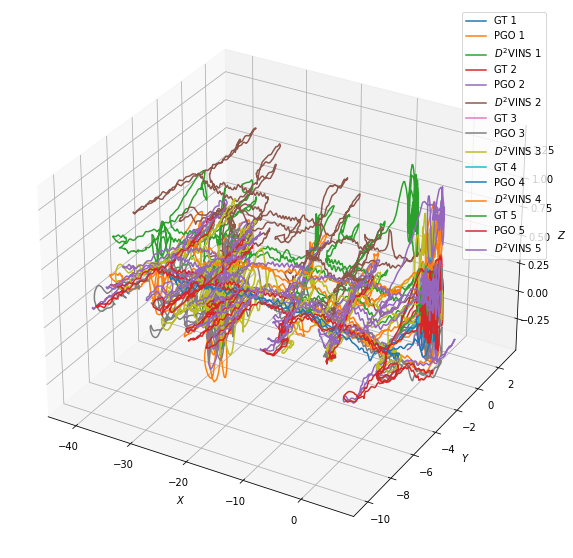

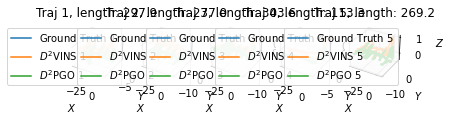

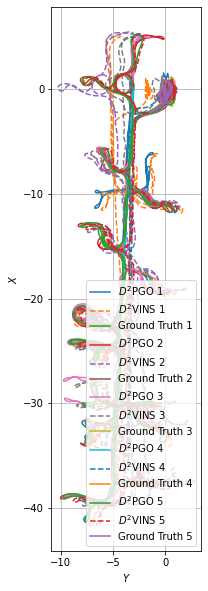

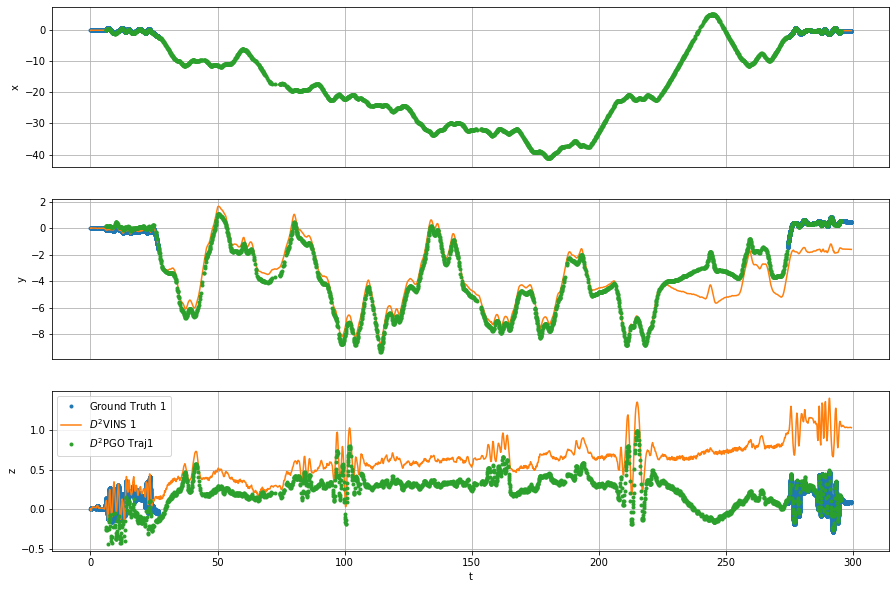

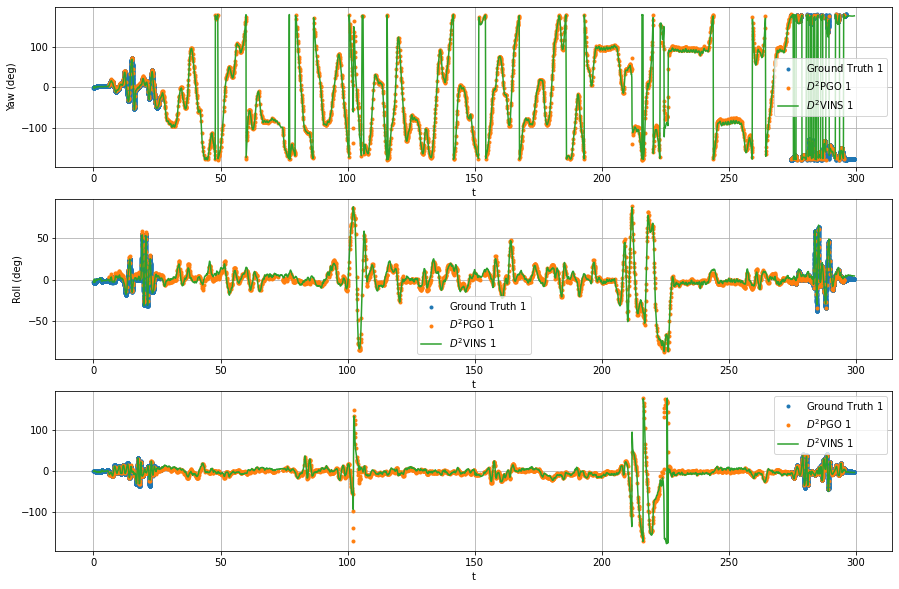

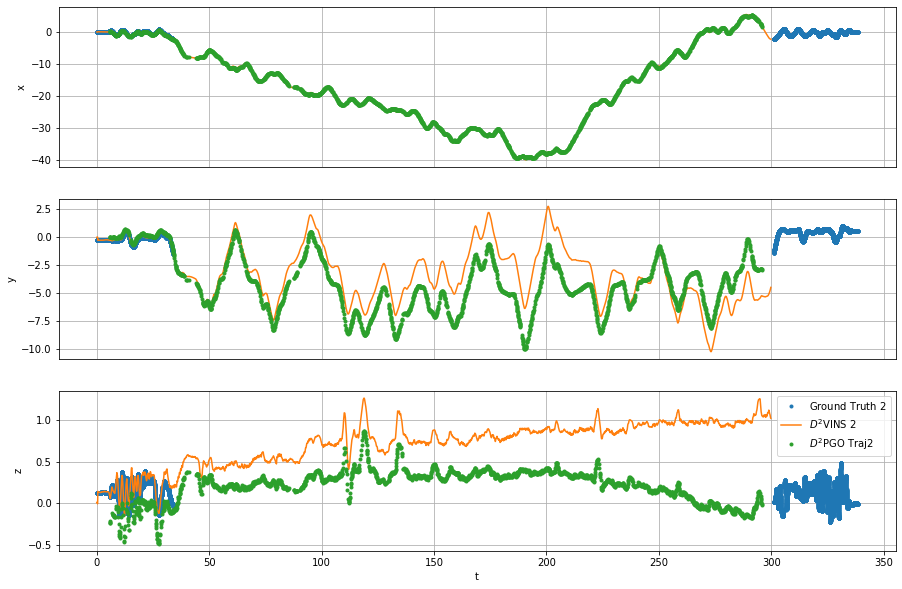

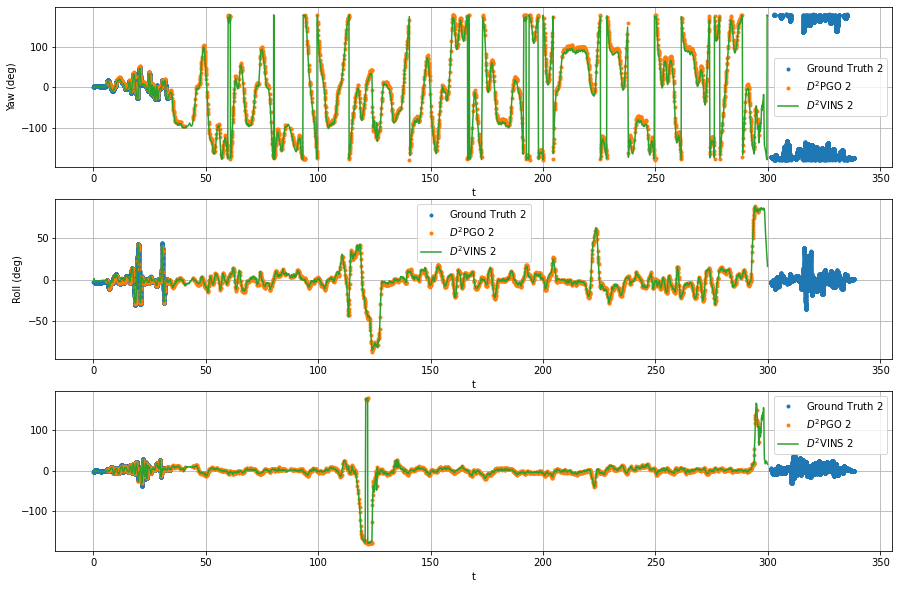

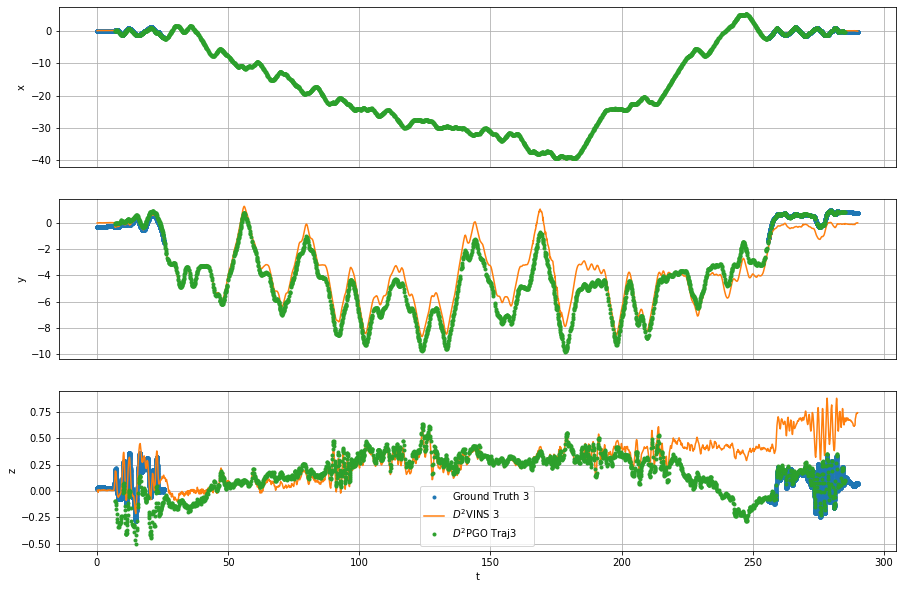

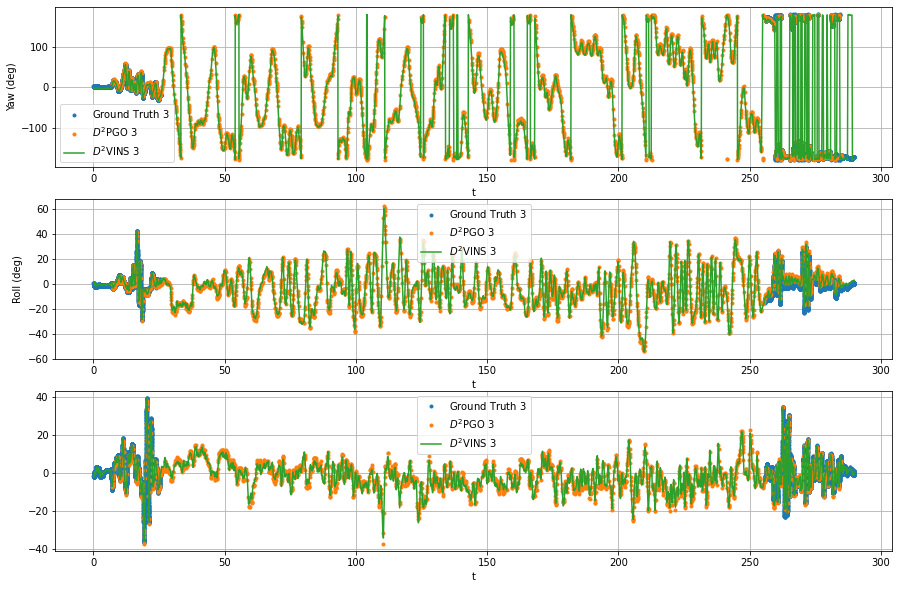

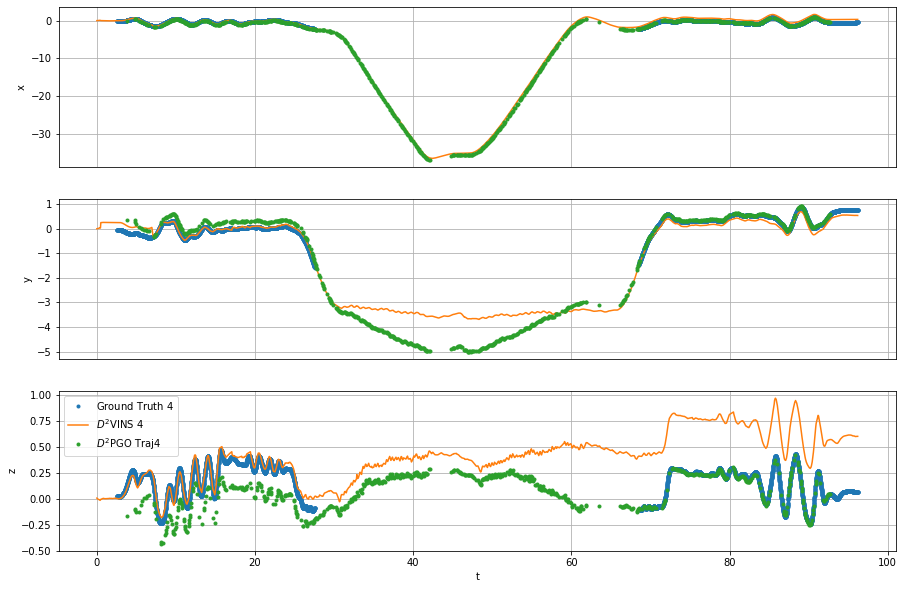

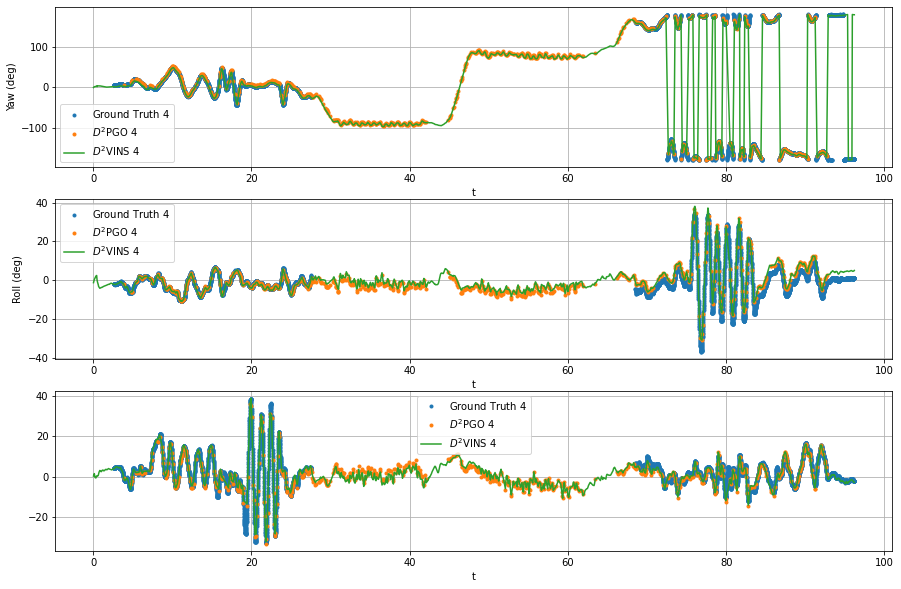

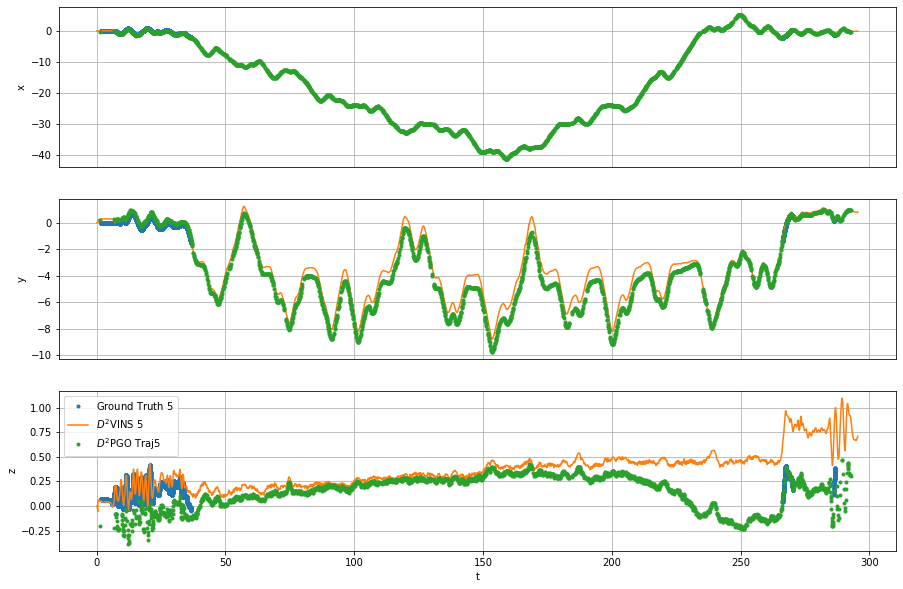

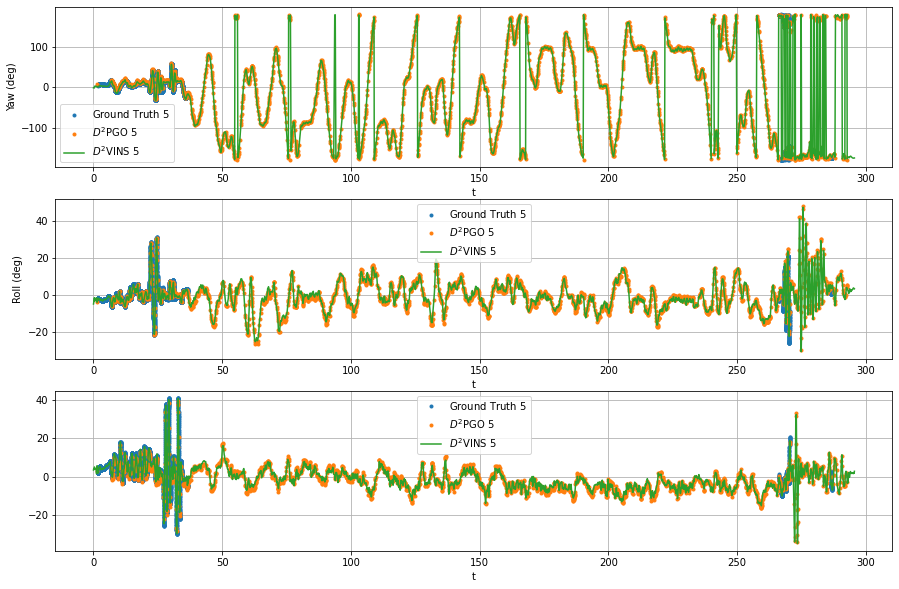

In [5]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/tum_corr/outputs/d2slam_compact/swarm"
data_folder="/home/xuhao/data/d2slam/tum_corr/"
dte = 550
paths, paths_pgo, t0 = read(output_folder, nodes)
paths_gt, t0 = read_paths(data_folder, nodes, prefix="groundtruth_", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)

display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte, common_time_dt=0.1))

plot_fused(nodes, paths, paths_gt, poses_pgo=paths_pgo, figsize=(15,10))